In [53]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [3]:
#Fetch Images Count from Folders

In [9]:
count = 0
dirs = os.listdir('Images/')
for dir in dirs:
    files= list(os.listdir('Images/'+dir))
    print(dir +' Folder has ' + str(len(files)) + ' Images')
    count = count + len(files)
print('Images Folder has ' + str(count) + ' Images')

Lilly Folder has 1000 Images
Lotus Folder has 1000 Images
Orchid Folder has 1000 Images
Sunflower Folder has 1000 Images
Tulip Folder has 1000 Images
Images Folder has 5000 Images


In [10]:
#Load Images into Arrays as Dataset

In [11]:
base_dir = 'Images/'
img_size = 180
batch=32


In [12]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                        seed = 123,
                                                        validation_split= 0.2,
                                                        subset = 'training',
                                                        batch_size=batch,
                                                        image_size=(img_size,img_size))
                                                        
val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                        seed = 123,
                                                        validation_split= 0.2,
                                                        subset = 'validation',
                                                        batch_size=batch,
                                                        image_size=(img_size,img_size))


                                                        


Found 4999 files belonging to 5 classes.
Using 4000 files for training.
Found 4999 files belonging to 5 classes.
Using 999 files for validation.


In [13]:
flower_names= train_ds.class_names
flower_names

['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']

In [15]:
import matplotlib.pyplot as plt

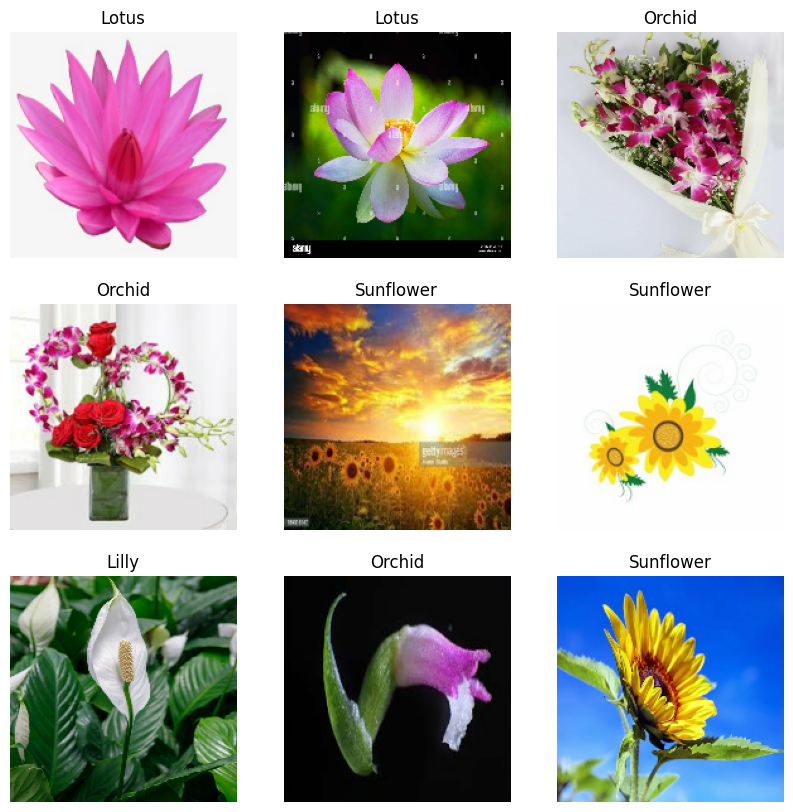

In [28]:
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i].numpy()]) 
        plt.axis('off')

plt.show()

In [29]:
AUTOTUNE= tf.data.AUTOTUNE

In [30]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [31]:
val_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [32]:
#data augmentation

In [37]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Input
data_augmentation = Sequential([
    Input(shape=(img_size, img_size, 3)), 
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

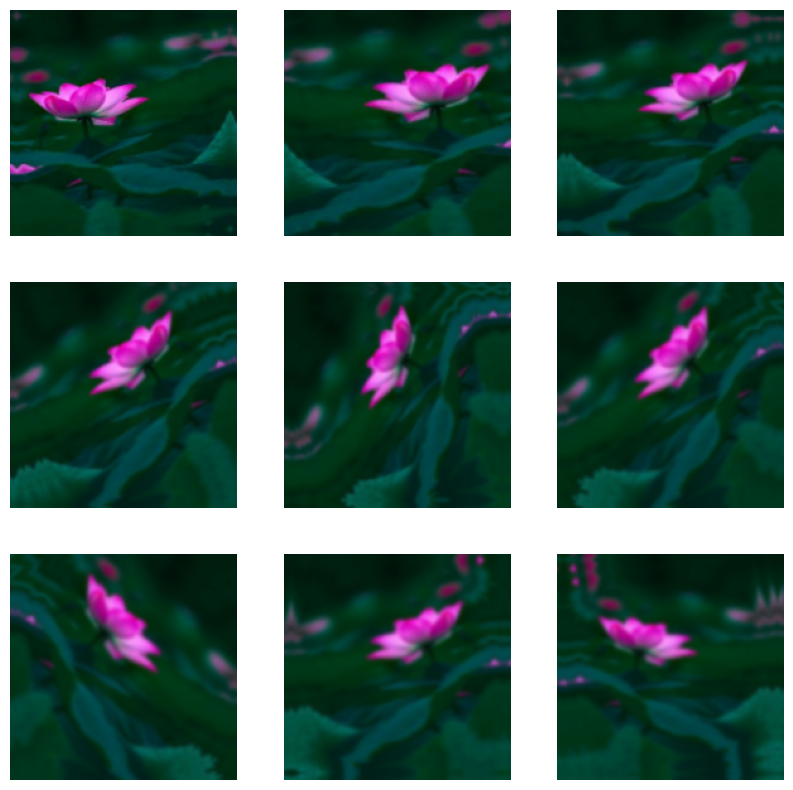

In [46]:
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

plt.show()

In [47]:
#Model Creation

In [55]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation ='relu'),
    Dense(5)
])

In [56]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_4 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
history= model.fit(train_ds, epochs= 15, validation_data= val_ds)

Epoch 1/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 107s 817ms/step - accuracy: 0.3502 - loss: 1.5036 - val_accuracy: 0.5483 - val_loss: 1.1417
Epoch 2/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.5421 - loss: 1.1090 - val_accuracy: 0.6115 - val_loss: 0.9732
Epoch 3/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.5890 - loss: 1.0188 - val_accuracy: 0.6492 - val_loss: 0.8903
Epoch 4/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.6371 - loss: 0.9389 - val_accuracy: 0.6475 - val_loss: 0.8751
Epoch 5/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 91s 724ms/step - accuracy: 0.6624 - loss: 0.8669 - val_accuracy: 0.7003 - val_loss: 0.7645
Epoch 6/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.6866 - loss: 0.7965 - val_accuracy: 0.7300 - val_loss: 0.7068
Epoch 7/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 116s 931ms/step - accuracy: 0.7101 - loss: 0.7513 - val_accuracy: 0.7520 - val_loss: 0.6415
Epoch 8/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 90s 715ms/step - accuracy: 0.7213 - loss: 0.7144 

In [61]:
input_image= tf.keras.utils.load_img('Sample/Lotus.jpg', target_size=(180,180))
input_image_array = tf.keras.utils.img_to_array(input_image)
input_image_exp_dim = tf.expand_dims(input_image_array, 0)

predictions = model.predict(input_image_exp_dim)
result = tf.nn.softmax(predictions[0])
flower_names[np.argmax(result)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


'Lilly'

In [68]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)
    predictions= model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of ' + str(np.max(result)*100)
    return outcome

In [69]:
classify_images('Sample/Orchid.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


'The Image belongs to Orchid with a score of 99.67924952507019'

In [70]:
model.save('Flower_Recog_Model.h5')